In [1]:
import pandas as pd

df = pd.read_csv("stats.csv", sep = ",", header=0)

df.info()
print(df.isnull().sum())
updated_df = df.dropna(axis=0)
updated_df.info()
print(updated_df['winner'].value_counts())

print(updated_df[['1','winner']].groupby(['winner']).value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

In [2]:
updated_df.describe()



,pts,rank,sets,1,2,3,4,5,avg_odds,max_odds,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,...,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,1611.825673,67.359305,2.492713,5.065583,5.055493,5.013453,4.967489,5.304933,2.721962,27.123145,...,101.762332,57.770740,13.036435,8.084081,13.142937,27.496637,30.274103,98.102018,5.881726,0.614247
std,2008.411396,79.067996,0.500087,1.690149,1.686525,1.728920,1.820940,3.393778,2.409728,1008.185309,...,19.496598,11.865654,9.526673,4.102131,5.149615,8.563444,8.167380,19.891453,3.476227,0.065324
min,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.010000,...,63.000000,22.000000,0.000000,0.000000,1.000000,7.000000,6.000000,53.000000,0.000000,0.392638
25%,615.000000,21.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.350000,1.410000,...,90.000000,50.000000,7.000000,5.000000,9.000000,21.000000,24.000000,85.000000,3.000000,0.570470
50%,952.500000,48.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.890000,2.020000,...,100.000000,57.000000,11.000000,8.000000,13.000000,27.000000,30.000000,96.000000,5.000000,0.615385
75%,1675.000000,89.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.180000,3.500000,...,110.000000,66.000000,17.000000,11.000000,16.250000,33.000000,36.000000,108.000000,8.000000,0.658683
max,16790.000000,1415.000000,3.000000,7.000000,7.000000,7.000000,7.000000,70.000000,25.150000,42586.000000,...,385.000000,117.000000,113.000000,25.000000,31.000000,69.000000,61.000000,361.000000,26.000000,0.904762


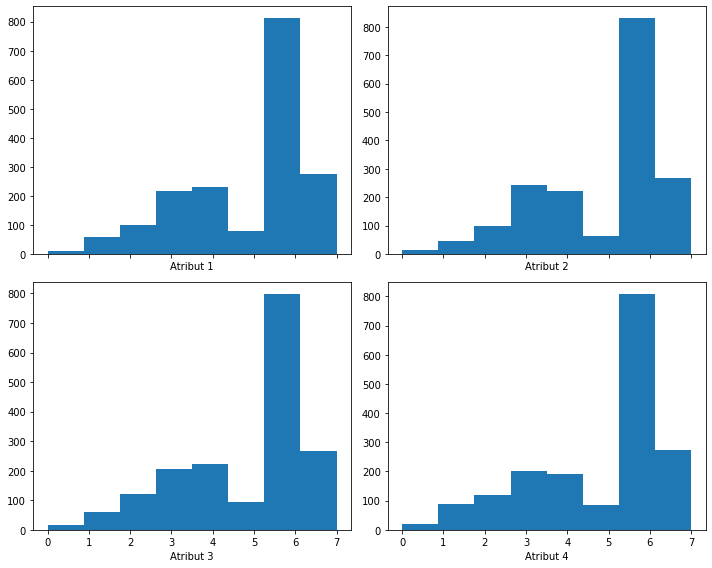

In [4]:
import matplotlib.pyplot as plt

xaxes = ['Atribut 1','Atribut 2','Atribut 3','Atribut 4']

fig, axes = plt.subplots(2, 2, figsize=(10,8),  sharex=True, tight_layout=True)
axes = axes.ravel()

for idx, ax in enumerate(axes):
    n, bins, patches = ax.hist(updated_df[str(idx+1)], bins=8)
    ax.set_xlabel(xaxes[idx])

plt.xticks(range(8))        
plt.show()


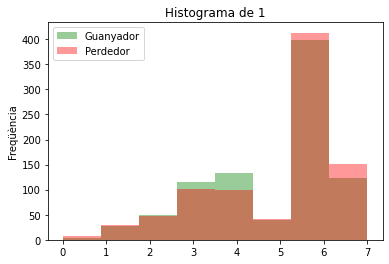

In [6]:
x1 = updated_df.loc[updated_df['winner'] == 1,'1']
x2 = updated_df.loc[updated_df['winner'] == 0,'1']
kwargs = dict(alpha=0.4, bins=8)
plt.hist(x1, **kwargs, color='g', label='Guanyador')
plt.hist(x2, **kwargs, color='r', label='Perdedor')
plt.xticks(range(8))
plt.gca().set(title='Histograma de 1', ylabel='Freqüència')
plt.legend();
plt.show()

In [7]:
#comprovar si columna-Atribut '1' segueix distribució normal

from scipy.stats import shapiro

stat, p = shapiro(updated_df['1'].values)
print('Columna 1: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement distribució Gausiana')
else:
    print('Probablement no distribució Gausiana')

print()

#comprovar si columna '1' del grup guanyador segueix distribució normal

stat, p = shapiro(updated_df[updated_df['winner']== True]['1'].values)
print('Columna 1 dins del grup guanyadors: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement distribució Gausiana')
else:
    print('Probablement no distribució Gausiana')

    
print()
#comprovar si columna '1' del grup perdedor segueix distribució normal

stat, p = shapiro(updated_df[updated_df['winner']== False]['1'].values)
print('Columna 1 dins del grup perdedors: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement distribució Gausiana')
else:
    print('Probablement no distribució Gausiana')


Columna 1: stat=0.843, p=0.000
Probablement no distribució Gausiana

Columna 1 dins del grup guanyadors: stat=0.853, p=0.000
Probablement no distribució Gausiana

Columna 1 dins del grup perdedors: stat=0.829, p=0.000
Probablement no distribució Gausiana


In [8]:
# atribut: 1
# davant la imposibilitat de convertir-la en una distribució normal, apliquem un mètode no paramètric
# dades separats en dos mostres 'guanyador' i 'perdedor'
# H0: 1 en guanyadors = 1 en perdedors  o 1 en guanyador - 1 perdedor = 0
# H1: 1 en guanyadors != 1 en perdedors


from scipy.stats import mannwhitneyu

data1 = updated_df[updated_df['winner']== True]['1'].values
data2 = updated_df[updated_df['winner']== False]['1'].values

stat, p = mannwhitneyu(data1, data2)

print('H0: 1 en guanyadors = 1 en perdedors  o 1 en guanyador - 1 perdedor = 0')
print('H1: 1 en guanyadors != 1 en perdedors')
print()
print('Estatistic de Mann Whitney U = %.3f, p-value = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Indicis de que tenen la mateixa distribució (no es pot rebutjar H0)')
else:
    print('Indicis de que no tenen la mateixa distribució (rebutjar H0)')


H0: 1 en guanyadors = 1 en perdedors  o 1 en guanyador - 1 perdedor = 0
H1: 1 en guanyadors != 1 en perdedors

Estatistic de Mann Whitney U = 377048.500, p-value = 0.044
Indicis de que no tenen la mateixa distribució (rebutjar H0)


In [9]:
# atributs: 2,3
# davant la imposibilitat de convertir les dades en distribucions normals, apliquem un mètode no paramètric
# H0: 2  = 3  o 2 - 3 = 0
# H1: 2  !=  3 

from scipy.stats import wilcoxon

data1 = updated_df['2'].values
data2 = updated_df['3'].values

stat, p = wilcoxon(data1, data2)

print('H0: atribut 2  = atribut 3  o 2 - 3 = 0')
print('H1:  atribut 2  !=  atribut 3 ')
print()
print('Estatistic de Mann Whitney U = %.3f, p-value = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Indicis de que tenen la mateixa distribució (no es pot rebutjar H0)')
else:
    print('Indicis de que no tenen la mateixa distribució (rebutjar H0)')

H0: atribut 2  = atribut 3  o 2 - 3 = 0
H1:  atribut 2  !=  atribut 3 

Estatistic de Mann Whitney U = 476032.000, p-value = 0.498
Indicis de que tenen la mateixa distribució (no es pot rebutjar H0)


In [10]:
# atributs: 1, 2 , 4
# davant la imposibilitat de convertir les dades en distribucions normals, apliquem un mètode no paramètric
# H0: 1 = 2 = 4
# H1: almenys un atribut diferent a la resta 


from scipy.stats import friedmanchisquare

data1 = updated_df['1'].values
data2 = updated_df['2'].values
data3 = updated_df['4'].values

stat, p = friedmanchisquare(data1, data2, data3)

print('H0: atribut 1  = atribut 2  = atribut 4')
print('H1: almenys un atribut diferent a la resta')
print()
print('Estatistic de Friedman Chi quadrat = %.3f, p-value = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Indicis de que tenen la mateixa distribució (no es pot rebutjar H0)')
else:
    print('Indicis de que almenys un no té la mateixa distribució (rebutjar H0)')

H0: atribut 1  = atribut 2  = atribut 4
H1: almenys un atribut diferent a la resta

Estatistic de Friedman Chi quadrat = 0.323, p-value = 0.851
Indicis de que tenen la mateixa distribució (no es pot rebutjar H0)
